In [66]:
import sys
import os

root_path = os.path.abspath('..')
if root_path not in sys.path:
    sys.path.insert(0, root_path)
    
functions_path = os.path.abspath('../Functions')
data_path = os.path.abspath('../Data')
algorithms_path = os.path.abspath('../Algorithms')

sys.path.append(functions_path)
sys.path.append(data_path)
sys.path.append(algorithms_path)

import numpy as np
import pandas as pd
import ruptures as rpt
import matplotlib.pyplot as plt
import time
from Functions.metrics import f_measure, covering
from tssb.utils import load_time_series_segmentation_datasets
from tssb.evaluation import covering
from claspy.segmentation import BinaryClaSPSegmentation
from claspy.data_loader import load_tssb_dataset
from tssb.utils import visualize_time_series


In [67]:
def process_group(group):
    ts = group['RWrist_Y']
    frame_peaks = group["frame_peaks"].to_numpy()
    cps = np.array([i for i, peak in enumerate(frame_peaks) if peak == 1])  # cps as numpy array
    window_size = 20  # Ensure window size is at least 1
    # Other processing can be added here if needed
    return ts, cps, window_size

<class 'pandas.core.frame.DataFrame'>
Time Series: P10_A: Found Change Points: [], Score: 0.0916014739229025


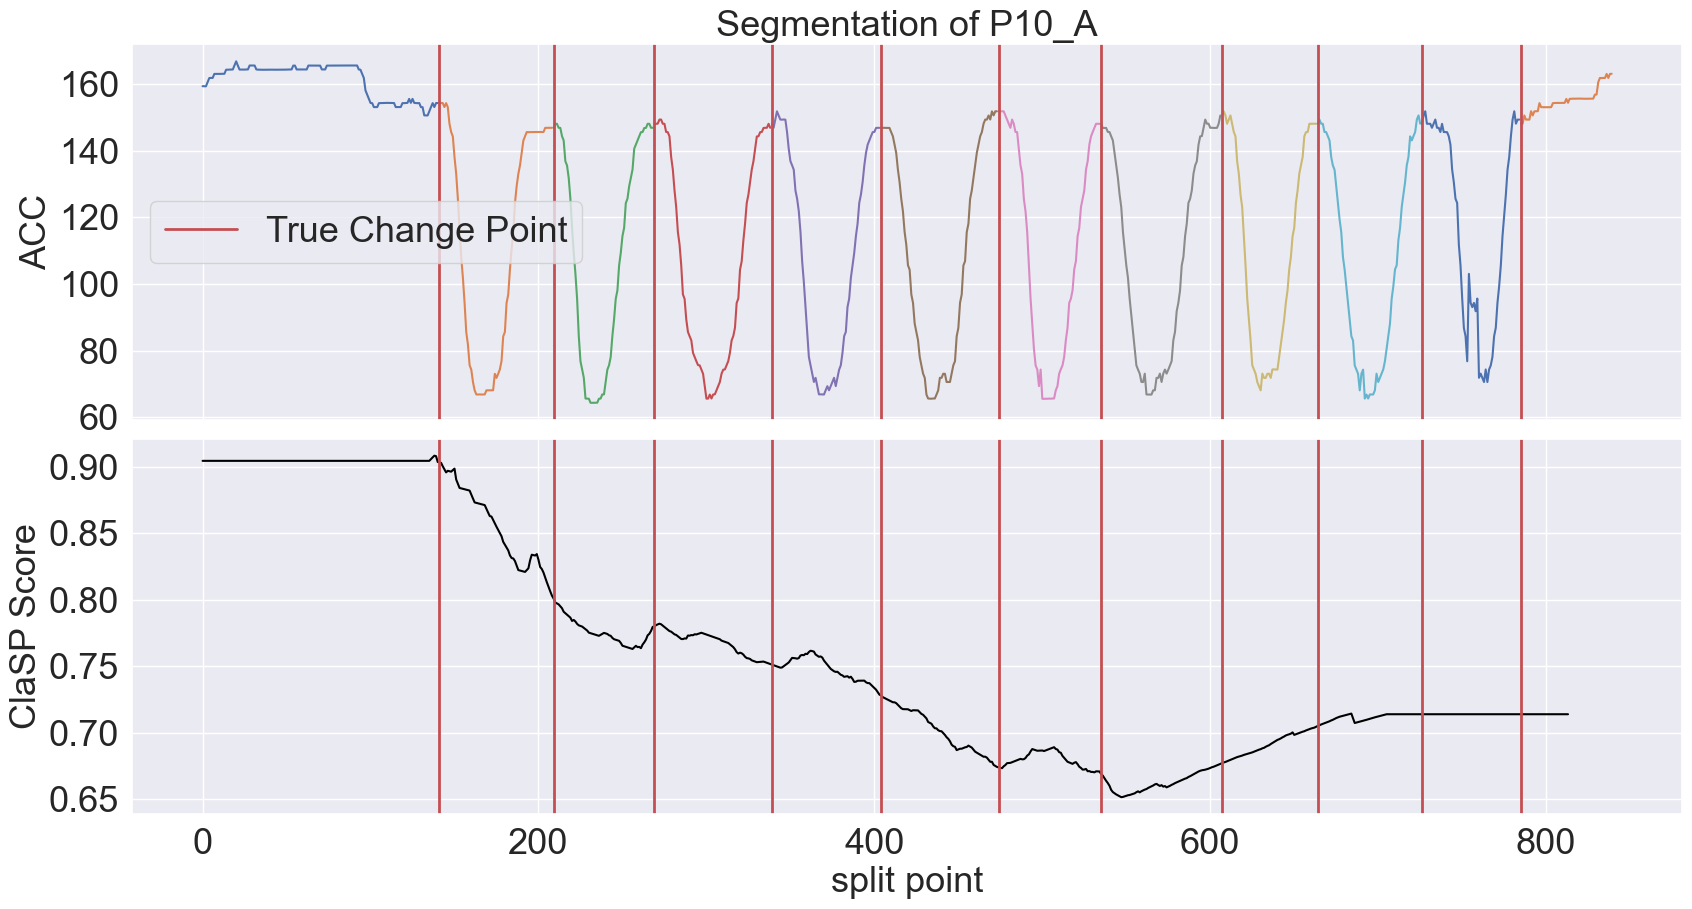

In [68]:
# Load your data
data = pd.read_csv('../Data/Physio/OpenPose-RightWristWithoutSegmentation-full_df.csv')

# Process the data
processed_data = []
for pid, group in data.groupby("pid"):    
    ts, cps, window_size = process_group(group)
    processed_data.append((pid, window_size, cps, ts))

# Create the DataFrame
tssb = pd.DataFrame(processed_data, columns=["dataset", "window_size", "change_points", "time_series"])
print(type(tssb))
clasp = BinaryClaSPSegmentation()
for _, (ts_name, window_size, cps, ts) in tssb.iloc[:1].iterrows():
    ts = np.array(ts)
    found_cps = clasp.fit_predict(ts)
    score = covering({0: cps}, found_cps, ts.shape[0])
    
    # plt.figure(figsize=(20, 6))
    # plt.plot(ts)
    # plt.xlabel('Time')
    # plt.ylabel('Value')
    # plt.title(f"Time Series Plot: {ts_name}")
    # plt.grid(True)
    # plt.show()
    
    print(f"Time Series: {ts_name}: Found Change Points: {found_cps.tolist()}, Score: {score}")
    clasp.plot(gt_cps=cps, heading=f"Segmentation of {ts_name}", ts_name="ACC")